In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error

In [13]:
df = pd.read_csv('A:/Upwork/First Job/test1.csv')
df

,x1,x2,y,time
0,-1.383423,0,10.677616,0.1
1,0.491178,0,18.885513,0.2
2,-0.528827,0,11.246081,0.3
3,-0.359455,0,9.364583,0.4
4,0.173340,0,13.434298,0.5
...,...,...,...,...
195,-0.027111,1,13.368749,19.6
196,-1.520284,1,13.958111,19.7
197,-1.227090,1,13.976362,19.8
198,-0.724484,1,8.581417,19.9


In [14]:
df.isnull().sum()

x1      0
x2      0
y       0
time    0
dtype: int64

In [15]:
df.drop('time', axis=1, inplace=True)
df

,x1,x2,y
0,-1.383423,0,10.677616
1,0.491178,0,18.885513
2,-0.528827,0,11.246081
3,-0.359455,0,9.364583
4,0.173340,0,13.434298
...,...,...,...
195,-0.027111,1,13.368749
196,-1.520284,1,13.958111
197,-1.227090,1,13.976362
198,-0.724484,1,8.581417


In [16]:
bias = np.repeat(1,200)
df = {'x_1':df['x1'],'x_1^2':np.power(df['x1'],2),'x_1^3':np.power(df['x1'],3),'x_1^4':np.power(df['x1'],4),'x_1^5':np.power(df['x1'],5),'x_2':df['x2'],'bias':bias,'y':df['y']}
df = pd.DataFrame(data=df,columns=['x_1','x_1^2','x_1^3','x_1^4','x_1^5','x_2','bias','y'])
df

,x_1,x_1^2,x_1^3,x_1^4,x_1^5,x_2,bias,y
0,-1.383423,1.913859,-2.647676,3.662855e+00,-5.067278e+00,0,1,10.677616
1,0.491178,0.241256,0.118500,5.820455e-02,2.858882e-02,0,1,18.885513
2,-0.528827,0.279658,-0.147891,7.820868e-02,-4.135887e-02,0,1,11.246081
3,-0.359455,0.129208,-0.046444,1.669465e-02,-6.000972e-03,0,1,9.364583
4,0.173340,0.030047,0.005208,9.028070e-04,1.564925e-04,0,1,13.434298
...,...,...,...,...,...,...,...,...
195,-0.027111,0.000735,-0.000020,5.402436e-07,-1.464661e-08,1,1,13.368749
196,-1.520284,2.311263,-3.513776,5.341938e+00,-8.121262e+00,1,1,13.958111
197,-1.227090,1.505750,-1.847691,2.267284e+00,-2.782162e+00,1,1,13.976362
198,-0.724484,0.524877,-0.380265,2.754963e-01,-1.995927e-01,1,1,8.581417


In [17]:
df.isnull().sum()

x_1      0
x_1^2    0
x_1^3    0
x_1^4    0
x_1^5    0
x_2      0
bias     0
y        0
dtype: int64

In [23]:
# Data for the first Model
x1 = df.loc[:,['x_1^3','x_1^5','x_2','bias']]
y = df.loc[:,'y']

In [25]:
x1

,x_1^3,x_1^5,x_2,bias
0,-2.647676,-5.067278e+00,0,1
1,0.118500,2.858882e-02,0,1
2,-0.147891,-4.135887e-02,0,1
3,-0.046444,-6.000972e-03,0,1
4,0.005208,1.564925e-04,0,1
...,...,...,...,...
195,-0.000020,-1.464661e-08,1,1
196,-3.513776,-8.121262e+00,1,1
197,-1.847691,-2.782162e+00,1,1
198,-0.380265,-1.995927e-01,1,1


In [46]:
## nom_variables = all the features including the bias in the model 
## example model1 = x_1^3 + x_1^5 _ x_2 + bias, 
## that means we have num_variables = 4

## Here i made a function to multi variable gradient decent to find 
## the best parameters to converge the data and to generalize on all 5 models
def multi_variable(x_point,y_points,learn_rate,nom_iteration,nom_variables):
    m = len(x_point)
    theta = np.repeat(0,nom_variables).reshape(nom_variables,1)
    cost_fun_all = []
    theta_all = []
    y_points = np.array(y_points).reshape(-1,1)
    
    for i in range(nom_iteration):
        theta_all.append(theta)
        y_pred = np.dot(x_point,theta) 
        #print(y_pred)
        
        error = y_pred - y_points
        
        cost_fun = (1/(2*m)) * np.sum(np.square(error))
        cost_fun_all.append(cost_fun)
        
        grad = (1/m) *np.sum(np.dot(error.T,x_point))
        
        theta = theta - learn_rate*grad
        #print(theta)
        if i > 1 :
            if np.abs((cost_fun_all[i] - cost_fun_all[i-1])) < 0.0001:
                break
                
            if np.linalg.norm(theta_all[i]-theta_all[i-1]) < 0.0001:
                break 
            if np.linalg.norm(grad) < 0.0001:
                break
        
    return y_pred,theta_all,cost_fun_all,i+1

In [47]:
y_pred1,theta_all,cost,nom_iter = multi_variable(x1,y,0.0001,10000,4)

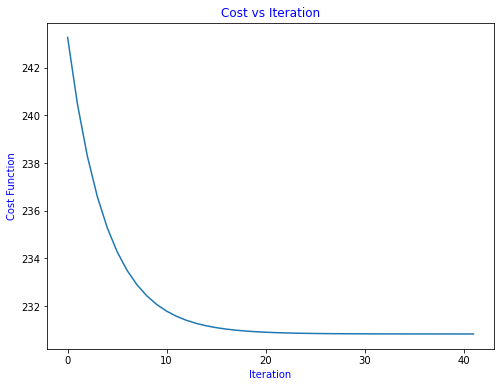

In [48]:
plt.figure(figsize=(8,6))
plt.plot(np.arange(nom_iter),cost);
plt.xlabel('Iteration',fontsize=10,color='b')
plt.ylabel('Cost Function',fontsize=10,color='b')
plt.title('Cost vs Iteration',fontsize=12,color='b');

In [49]:
model_error1= mean_squared_error(y,y_pred1)
model_error1

461.6503878377522

In [59]:
print(f"data converged after {nom_iter} iteration")

data converged after 42 iteration


In [60]:
## AIC FOR THE FIRST MODEL 
# calculate aic for model1
def calculate_aic(n, mse, num_params):
    aic = n * np.log(mse) + 2 * num_params
    return aic



Number of parameters: 5
MSE: 59.127


In [178]:
# calculate the aic for model1
aic1 = calculate_aic(len(y), model_error1, num_params)
print('AIC: %.3f' % aic)

AIC: 1113.924


In [179]:
# calculate bic for model1
def calculate_bic(n, mse, num_params):
    bic = n * np.log(mse) + num_params * np.log(n)
    return bic

In [180]:
# calculate the bic
bic1 = calculate_bic(len(y), model_error1, num_params)
print('BIC: %.3f' % bic)

BIC: 1133.714


## For the second Model

In [181]:
# Data for the second Model
x2 = df.loc[:,['x_1','x_2','bias']]
y = df.loc[:,'y']

In [182]:
y_pred2,theta_all,cost,nom_iter = multi_variable(x2,y,0.001,10000,3)

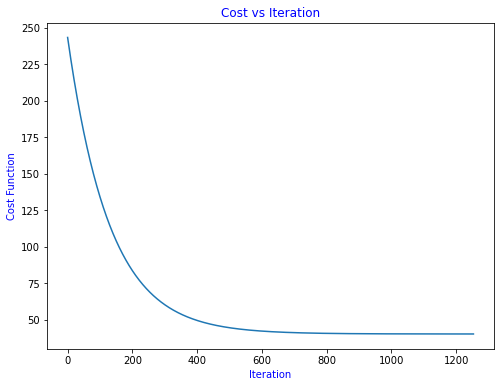

In [183]:
plt.figure(figsize=(8,6))
plt.plot(np.arange(nom_iter),cost);
plt.xlabel('Iteration',fontsize=10,color='b')
plt.ylabel('Cost Function',fontsize=10,color='b')
plt.title('Cost vs Iteration',fontsize=12,color='b');

In [184]:
model_error2 = mean_squared_error(y,y_pred2)
model_error2

80.30406094786471

In [185]:
print(f"data converged after {nom_iter} iteration")


data converged after 1254 iteration


In [186]:
## AIC & BIC FOR THE Second MODEL 

def calculate_aic(n, mse, num_params):
    aic = n * np.log(mse) + 2 * num_params
    return aic

# calculate the aic
aic2 = calculate_aic(len(y), model_error2, num_params)
print('AIC: %.3f' % aic)

AIC: 1113.924


In [187]:
# calculate bic for regression
def calculate_bic(n, mse, num_params):
    bic = n * np.log(mse) + num_params * np.log(n)
    return bic
# calculate the bic
bic2 = calculate_bic(len(y), model_error2, num_params)
print('BIC: %.3f' % bic)

BIC: 1133.714


## For the Third Model

In [188]:
# Data for the third model
x3 = df.loc[:,['x_1','x_1^2','x_1^4','x_2','bias']]
y = df.loc[:,'y']

In [189]:
y_pred3,theta_all,cost,nom_iter = multi_variable(x3,y,0.001,10000,5)

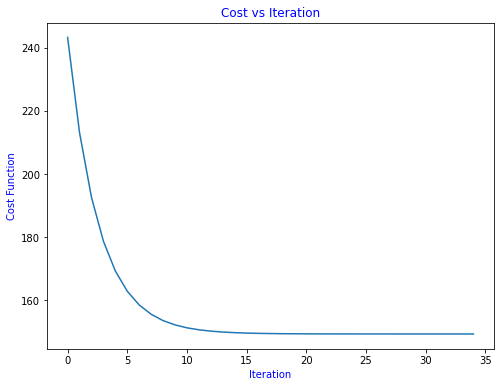

In [190]:
plt.figure(figsize=(8,6))
plt.plot(np.arange(nom_iter),cost);
plt.xlabel('Iteration',fontsize=10,color='b')
plt.ylabel('Cost Function',fontsize=10,color='b')
plt.title('Cost vs Iteration',fontsize=12,color='b');

In [191]:
model_error3= mean_squared_error(y,y_pred3)
model_error3

298.5779760085269

In [83]:
print(f"data converged after {nom_iter} iteration")


data converged after 35 iteration


In [175]:
# ## AIC & BIC FOR THE Third MODEL 


# calculate aic for model3
def calculate_aic(n, mse, num_params):
    aic = n * np.log(mse) + 2 * num_params
    return aic
# calculate the aic
aic3 = calculate_aic(len(y), model_error3, num_params)
print('AIC: %.3f' % aic)

AIC: 1113.924


In [174]:
# calculate bic for regression
def calculate_bic(n, mse, num_params):
    bic = n * np.log(mse) + num_params * np.log(n)
    return bic
# calculate the bic
bic3 = calculate_bic(len(y), model_error3, num_params)
print('BIC: %.3f' % bic)

BIC: 1133.714


## For the fourth Model

In [88]:
#Data for the fourth model
x4 = df.loc[:,['x_1','x_1^2','x_1^3','x_1^5','x_2','bias']]
y = df.loc[:,'y']

In [89]:
y_pred4,theta_all,cost,nom_iter = multi_variable(x4,y,0.0001,100000,6)

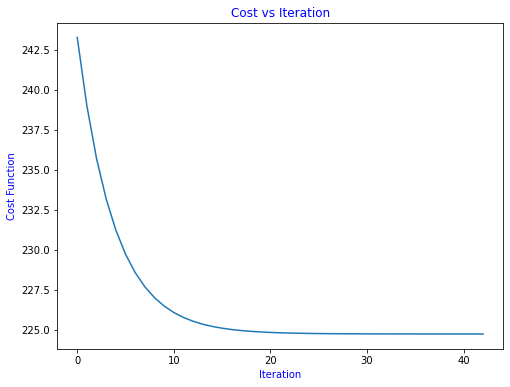

In [90]:
plt.figure(figsize=(8,6))
plt.plot(np.arange(nom_iter),cost);
plt.xlabel('Iteration',fontsize=10,color='b')
plt.ylabel('Cost Function',fontsize=10,color='b')
plt.title('Cost vs Iteration',fontsize=12,color='b');

In [91]:
model_error4= mean_squared_error(y,y_pred4)
model_error4

449.4716806872029

In [92]:
print(f"data converged (reached to the best parameters) after {nom_iter} iteration")


data converged (reached to the best parameters) after 43 iteration


In [173]:
## AIC & BIC FOR THE Fourth MODEL 
def calculate_aic(n, mse, num_params):
    aic = n * np.log(mse) + 2 * num_params
    return aic
# calculate the aic
aic4 = calculate_aic(len(y), model_error4, num_params)
print('AIC: %.3f' % aic)

AIC: 1113.924


In [172]:
# calculate bic for model1
def calculate_bic(n, mse, num_params):
    bic = n * np.log(mse) + num_params * np.log(n)
    return bic
# calculate the bic
bic4 = calculate_bic(len(y), model_error4, num_params)
print('BIC: %.3f' % bic)

BIC: 1133.714


## For the fivth model 

In [111]:
# Data for the fivth model 
x5 = df.loc[:,['x_1','x_1^3','x_1^4','x_2','bias']]
y = df.loc[:,'y']

In [112]:
y_pred5,theta_all,cost,nom_iter = multi_variable(x5,y,0.001,100000,5)

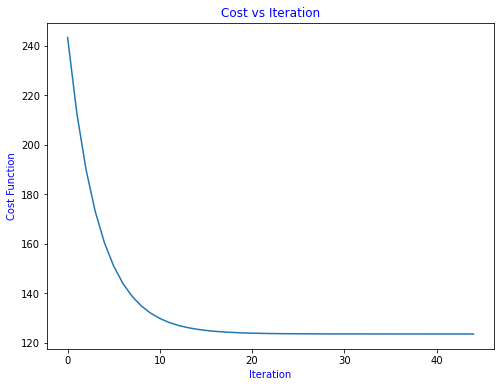

In [113]:
plt.figure(figsize=(8,6))
plt.plot(np.arange(nom_iter),cost);
plt.xlabel('Iteration',fontsize=10,color='b')
plt.ylabel('Cost Function',fontsize=10,color='b')
plt.title('Cost vs Iteration',fontsize=12,color='b');

In [141]:
model_error5= mean_squared_error(y,y_pred5)
model_error5

247.05733059386918

In [142]:
#for the fivth model
#data will find the best parameters (converge) after (nom_iter) iteration
print(f"data converged after {nom_iter} iteration")


data converged after 45 iteration


In [170]:
## AIC & BIC FOR THE fith MODEL 

# calculate aic for model1
def calculate_aic(n, mse, num_params):
    aic = n * np.log(mse) + 2 * num_params
    return aic
# calculate the aic
aic5 = calculate_aic(len(y), model_error5, num_params)
print('AIC: %.3f' % aic5)

AIC: 1113.924


In [171]:
# calculate bic for regression
def calculate_bic(n, mse, num_params):
    bic = n * np.log(mse) + num_params * np.log(n)
    return bic
# calculate the bic
bic5 = calculate_bic(len(y), model_error5, num_params)
print('BIC: %.3f' % bic5)

BIC: 1133.714


In [195]:
print(f"The best model is the one that provides the minimum BIC and minimum AIC which is Model 2\nthat have {aic2}  aic value and {bic2} bic value  mse")
print(f"")

The best model is the one that provides the minimum BIC and minimum AIC which is Model 2
that have 889.164038375307  aic value and 908.9539425745952 bic value  mse

